In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as SklearnLR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [33]:
data = pd.read_csv("crop_yield_data.csv")

In [34]:
data.head(3)


,rainfall_mm,soil_quality_index,farm_size_hectares,sunlight_hours,fertilizer_kg,crop_yield
0,1626,9,636,11,1006,404
1,1959,9,73,11,112,115
2,1360,1,352,5,702,231


In [35]:
data.isnull().sum()

rainfall_mm           0
soil_quality_index    0
farm_size_hectares    0
sunlight_hours        0
fertilizer_kg         0
crop_yield            0
dtype: int64

In [82]:
def check_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)

    IQR = Q3 - Q1

    upper_border = Q3 + 1.5 * IQR
    lower_border = Q1 - 1.5 * IQR
    print(f'Границы [{lower_border}, {upper_border}]')

    outliers = data[(data[column] < lower_border) | (data[column] > upper_border)]
    n = len(outliers)
    print(n)

Границы [-214.0, 2746.0]
0
Границы [-4.5, 15.5]
0
Границы [-506.5, 1489.5]
0
Границы [0.0, 16.0]
0
Границы [-1163.125, 4257.875]
0
Границы [-185.0, 839.0]
0


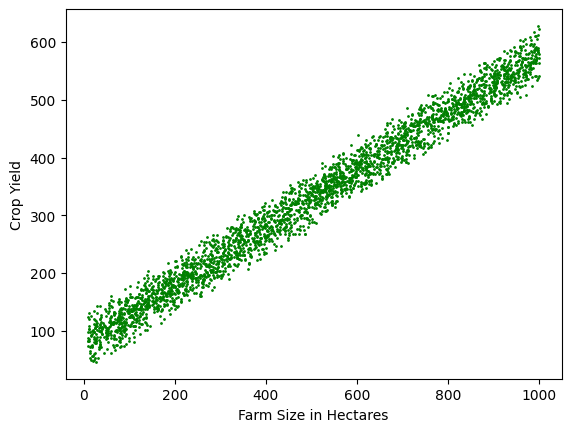

In [83]:
for col in data.columns:
    check_outliers(data, col)
plt.scatter(data.farm_size_hectares, data.crop_yield, s=1, c='g')
plt.xlabel('Farm Size in Hectares')
plt.ylabel('Crop Yield')
plt.show()

In [71]:
class LinearRegression:
    def __init__(self, learning_rate=0.000001, epochs=5000):
        self.lr = learning_rate
        self.ep = epochs
        self.weights = None
        self.bias = None

    #ЧЕРЕЗ ГРАДИЕНТНЫЙ СПУК
    def fit(self, X, y):
        n_samp, n_features = X.shape

        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.ep):
            y_predicted = np.dot(X, self.weights) + self.bias

            dw = (1 / n_samp) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samp) * np.sum(y_predicted - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    #ЧЕРЕЗ НОРМ УРАВНЕНИЕ

    def fit2(self, X, y):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        w = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
        print(w)
        self.bias, self.weights = w
        

    def predict(self, X):
        y_predicted = np.dot(X, self.weights) + self.bias
        return y_predicted

    def ret_weights(self):
        return self.weights, self.bias
        

In [72]:
X = data[['farm_size_hectares']] 
y = data['crop_yield']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)


model = LinearRegression(learning_rate=1e-8)
model.fit2(X_train, y_train)

[79.38410344  0.49903029]


Slope: 0.49903028596174803, intercept: 79.38410344117219


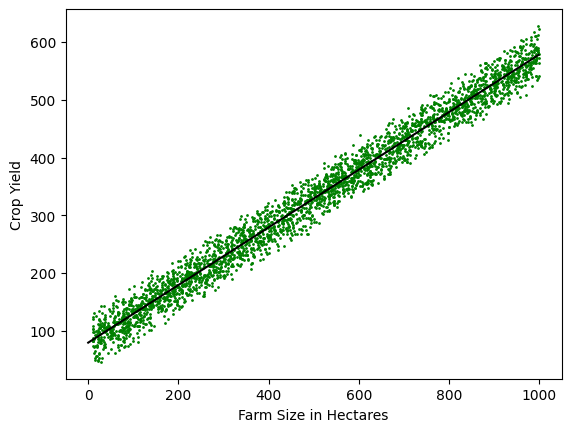

In [76]:
plt.scatter(data.farm_size_hectares, data.crop_yield, s=1, c='g')
plt.xlabel('Farm Size in Hectares')
plt.ylabel('Crop Yield')
m, b = model.ret_weights()
print(f"Slope: {m}, intercept: {b}")
plt.plot(list(range(0, 1000)), [m*x + b for x in range(1000)], c='blacK')
plt.show()

In [79]:

X = data[['farm_size_hectares']]
y = data['crop_yield']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

model = LinearRegression(0.05, epochs=15000)
model.fit(X_train_scaled, y_train)
y_pred_custom = model.predict(X_test_scaled)

model2 = LinearRegression(0.05, epochs=15000)
model2.fit2(X_train_scaled, y_train)
y_pred_custom2 = model.predict(X_test_scaled)

sk = SklearnLR()
sk.fit(X_train_scaled, y_train)
y_pred_sk = sk.predict(X_test_scaled)

print("\nФИНАЛ:")
print(f"Custom MSE ЧЕРЕЗ СПУСК:  {mean_squared_error(y_test, y_pred_custom):.10f}")
print(f"Custom MSE ЧЕРЕЗ НОРМ УРАВНЕНИЕ:  {mean_squared_error(y_test, y_pred_custom2):.10f}")
print(f"Sklearn MSE: {mean_squared_error(y_test, y_pred_sk):.10f}")

[327.65375    143.67020109]

ФИНАЛ:
Custom MSE ЧЕРЕЗ СПУСК:  464.1798999488
Custom MSE ЧЕРЕЗ НОРМ УРАВНЕНИЕ:  464.1798999488
Sklearn MSE: 464.1798999488
